In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import collections

from collections import Counter

%matplotlib inline

In [2]:
source1 = 'dataset/socfb-Mich67.txt' 
source2 = 'dataset/socfb-Swarthmore42.txt'

In [3]:
# This function is used for reading the data and creating the graph.
# source: file location
# G: Graph
def create_graph(source):
    G = nx.Graph()
    with open(source) as file:
        lines = file.readlines()
        for line in lines:
            nodes = line.split()
            G.add_edge(nodes[0], nodes[1])
    return G

In [5]:
G1 = create_graph(source1)
G2 = create_graph(source2)

#### Graph Informations

In [8]:
def print_graph_info(G):
    ds = list(G.degree())
    
    print('Number of nodes: {}'.format(G.number_of_nodes()))
    print('Number of edges: {}'.format(G.number_of_edges()))
    
    degree = [int(i) for i in np.array(list(G.degree()))[:,1]]
    
    print('Max degree: {}'.format(np.max(degree)))
    print('Min degree: {}'.format(np.min(degree)))
    print('Average degree: {}'.format(np.mean(degree)))
    print('Median degree: {}'.format(np.median(degree)))

In [9]:
print('\t "Graph1 information" ')
print_graph_info(G1)
print()
print('\t "Graph2 information" ')
print_graph_info(G2)

	 "Graph1 information" 
Number of nodes: 3748
Number of edges: 81903
Max degree: 419
Min degree: 1
Average degree: 43.704909284951974
Median degree: 30.0

	 "Graph2 information" 
Number of nodes: 1661
Number of edges: 61052
Max degree: 577
Min degree: 1
Average degree: 73.51234196267309
Median degree: 59.0


#### Graph Adjacency Matrix

In [10]:
# This function is used to show adjacency matrix
# G: Graph
# ax: for show
# title: title of the adjacency matrix 
def show_adjacency_matrix(G, ax, title):
    A = nx.to_numpy_matrix(G, dtype=np.bool)
    
    ax.set_title(title)
    ax.imshow(A, cmap="Greys", interpolation="none")

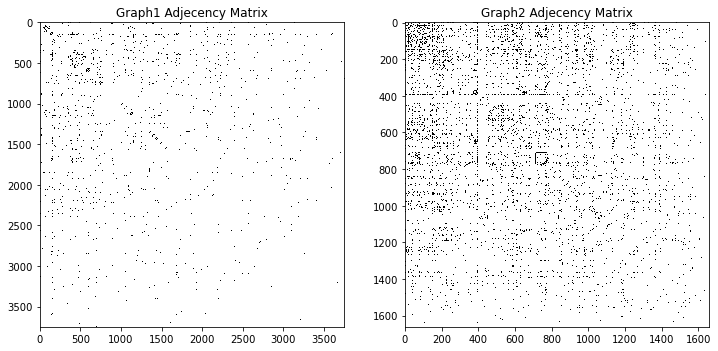

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
show_adjacency_matrix(G1, ax1, 'Graph1 Adjecency Matrix')
show_adjacency_matrix(G2, ax2, 'Graph2 Adjecency Matrix')

#### Graph Degree Distribution

In [12]:
# This function is used to plot degree distribution
# G: Graph
# ax: for show 
# title: title of the degree distribution
def plot_degree_dist(G, ax, title):
    dfreq = np.array(nx.degree_histogram(G)).astype('float')
    ax.stem(dfreq, linefmt ='black', use_line_collection = True)
    ax.set_xlabel("Degree")
    ax.set_ylabel("Frequency")

In [13]:
# This function is used to plot degree distribution
# G1: Graph1
# G2: Graph2
# ax: for show 
# title: title of the degree distribution
def plot_degree_dist_overlay(G1, G2, ax, title):
    dfreq1 = np.array(nx.degree_histogram(G1)).astype('float')
    dfreq2 = np.array(nx.degree_histogram(G2)).astype('float')
    ax.stem(dfreq1, linefmt ='black', use_line_collection = True)
    ax.stem(dfreq2, linefmt ='grey', markerfmt = 'green', use_line_collection = True)
    ax.set_xlabel("Degree")
    ax.set_ylabel("Frequency")

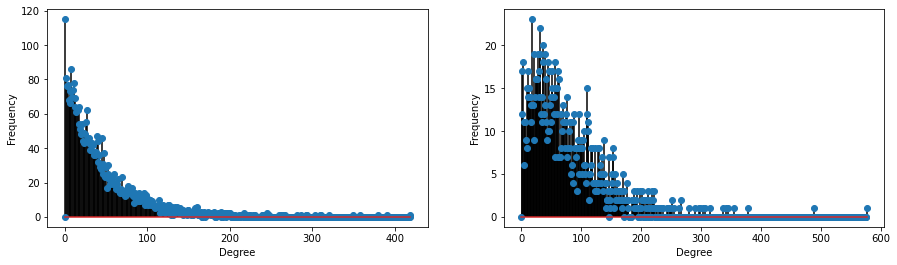

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_degree_dist(G1, ax1, 'Graph1 Degree Distribution')
plot_degree_dist(G2, ax2, 'Graph2 Degree Distribution')

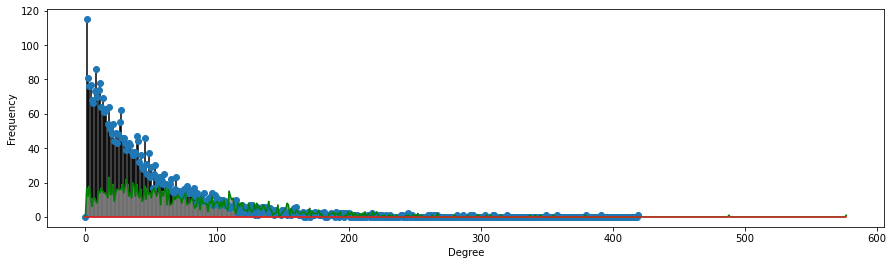

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
plot_degree_dist_overlay(G1, G2, ax, 'Graph Degree Distribution')